In [124]:
import kagglehub

path = kagglehub.dataset_download("adityajn105/flickr8k")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flickr8k


In [125]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses, metrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [126]:
captions = pd.read_csv('/kaggle/input/flickr8k/captions.txt')

In [127]:
def captionPreprocessing(caption):
    caption = caption.lower()
    caption = caption.translate(str.maketrans('', '', string.punctuation)) 
    caption = ' '.join([word for word in caption.split() if len(word) > 1]) 
    caption = f"<start> {caption} <end>"
    return caption

captions['cleanedCaption'] = captions['caption'].apply(captionPreprocessing)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions['cleanedCaption'])

sequences = tokenizer.texts_to_sequences(captions['cleanedCaption'])

max_length = max([len(seq) for seq in sequences])

padded_sequences = pad_sequences(sequences, maxlen = max_length, padding = 'post')
vocab_size = len(tokenizer.word_index) + 1
vocabulary = tokenizer.word_index

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


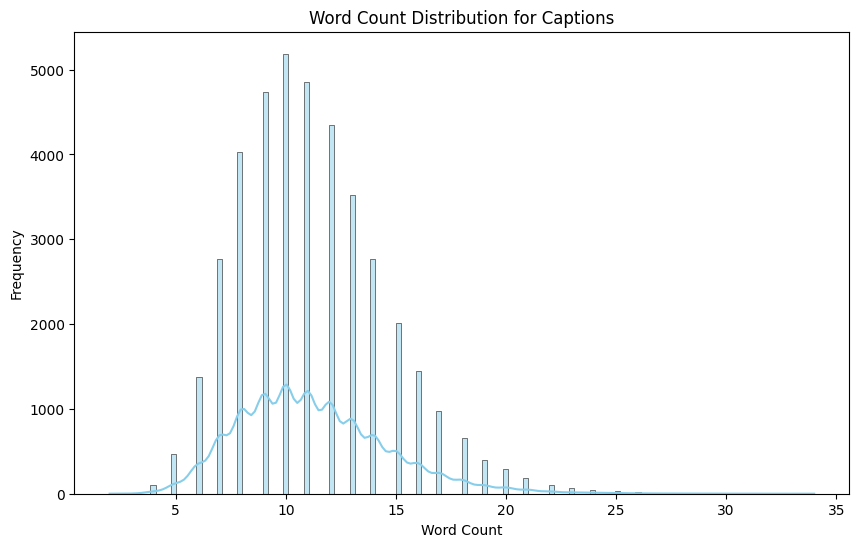

In [128]:
captions['wordCount'] = captions['cleanedCaption'].apply(lambda x: len(x.split()))

plt.figure(figsize = (10, 6))
sns.histplot(captions['wordCount'], kde = True, color = 'skyblue')
plt.title("Word Count Distribution for Captions")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

(-0.5, 799.5, 399.5, -0.5)

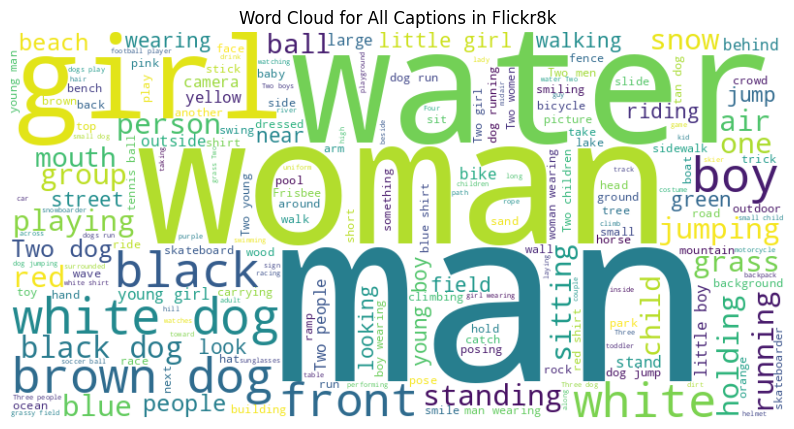

In [129]:
text = " ".join(captions['caption'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for All Captions in Flickr8k")
plt.axis("off")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


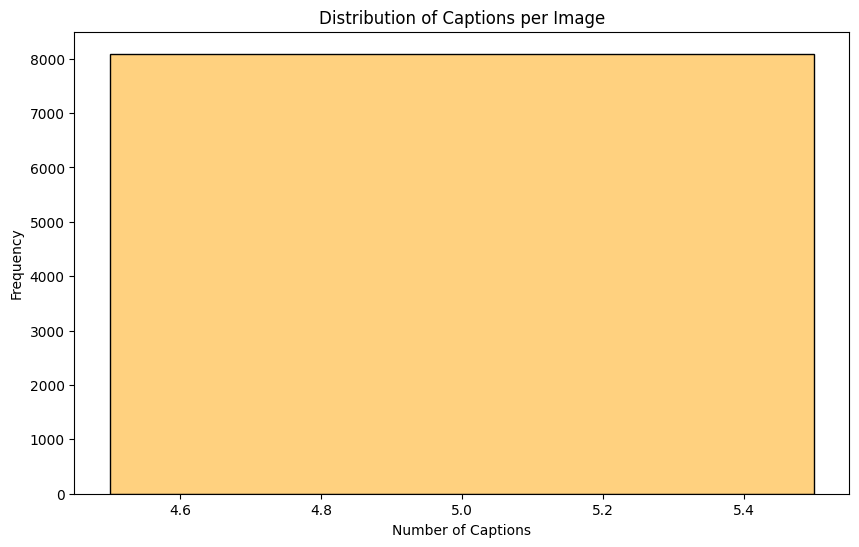

In [130]:
caption_counts = captions.groupby('image').size()

plt.figure(figsize=(10, 6))
sns.histplot(caption_counts, kde=True, color='orange')
plt.title("Distribution of Captions per Image")
plt.xlabel("Number of Captions")
plt.ylabel("Frequency")
plt.show()
